In [30]:
######################################################
# İŞ PROBLEMİ
######################################################

In [31]:
# Facebook kısa süre önce mevcut "maximumbidding" adı verilen teklif verme türüne alternatif olarak yeni
# bir teklif türü olan "average bidding"’i tanıttı. Müşterilerimizden biri olan bombabomba.com, bu yeni özelliği
# test etmeye karar verdi ve average bidding'in maximumbidding'den daha fazla dönüşüm getirip getirmediğini anlamak için bir A/B testi yapmak istiyor.
# A/B testi 1 aydır devam ediyor ve bombabomba.com şimdi sizden bu A/B testinin sonuçlarını analiz etmenizi bekliyor.
# Bombabomba.com için nihai başarı ölçütü Purchase'dır. Bu nedenle, istatistiksel testler için Purchase metriğine odaklanılmalıdır.

In [32]:
#####################################################
# VERİ SETİ HİKAYESİ
#####################################################

In [33]:
# Bir firmanın web sitesi bilgilerini içeren bu veri setinde kullanıcıların gördükleri ve tıkladıkları
# reklam sayıları gibi bilgilerin yanı sıra buradan gelen kazanç bilgileri yer almaktadır. Kontrol ve Test
# grubu olmak üzere iki ayrı veri seti vardır. Bu veri setleri ab_testing.xlsx excel’in ayrı sayfalarında yer
# almaktadır. Kontrol grubuna Maximum Bidding, test grubuna Average Bidding uygulanmıştır.

In [34]:
# impression: Reklam görüntüleme sayısı
# Click: Görüntülenen reklama tıklama sayısı
# Purchase: Tıklanan reklamlar sonrası satın alınan ürün sayısı
# Earning: Satın alınan ürünler sonrası elde edilen kazanç

In [35]:
#####################################################
# PROJE GÖREVLERİ
#####################################################

In [36]:
#####################################################
# Görev 1:  Veriyi Hazırlama ve Analiz Etme
#####################################################

In [37]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, ttest_ind

In [38]:
pd.set_option("display.max_columns", None)      # Tüm sütunların gözükmesini sağlar
pd.set_option("display.expand_frame_repr", False)      # Dataframe çıktısının tek satırda gösterilmesi sağlar
pd.set_option("display.float_format", lambda x: '%.5f' % x)    # Ondalık sayıları 5 basamaklı şeklinde gösterir

In [39]:
dataframe_control = pd.read_excel("/content/ab_testing.xlsx" , sheet_name="Control Group")
dataframe_test = pd.read_excel("/content/ab_testing.xlsx" , sheet_name="Test Group")

In [40]:
df_control = dataframe_control.copy()
df_test = dataframe_test.copy()

In [41]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head())
    print("##################### Tail #####################")
    print(dataframe.tail())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [42]:
check_df(df_control)

##################### Shape #####################
(40, 4)
##################### Types #####################
Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object
##################### Head #####################
    Impression      Click  Purchase    Earning
0  82529.45927 6090.07732 665.21125 2311.27714
1  98050.45193 3382.86179 315.08489 1742.80686
2  82696.02355 4167.96575 458.08374 1797.82745
3 109914.40040 4910.88224 487.09077 1696.22918
4 108457.76263 5987.65581 441.03405 1543.72018
##################### Tail #####################
     Impression      Click  Purchase    Earning
35 132064.21900 3747.15754 551.07241 2256.97559
36  86409.94180 4608.25621 345.04603 1781.35769
37 123678.93423 3649.07379 476.16813 2187.72122
38 101997.49410 4736.35337 474.61354 2254.56383
39 121085.88122 4285.17861 590.40602 1289.30895
##################### NA #####################
Impression    0
Click         0
Purchase      0
Earning       0
dtype: int6

In [43]:
check_df(df_test)

##################### Shape #####################
(40, 4)
##################### Types #####################
Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object
##################### Head #####################
    Impression      Click  Purchase    Earning
0 120103.50380 3216.54796 702.16035 1939.61124
1 134775.94336 3635.08242 834.05429 2929.40582
2 107806.62079 3057.14356 422.93426 2526.24488
3 116445.27553 4650.47391 429.03353 2281.42857
4 145082.51684 5201.38772 749.86044 2781.69752
##################### Tail #####################
     Impression      Click  Purchase    Earning
35  79234.91193 6002.21358 382.04712 2277.86398
36 130702.23941 3626.32007 449.82459 2530.84133
37 116481.87337 4702.78247 472.45373 2597.91763
38  79033.83492 4495.42818 425.35910 2595.85788
39 102257.45409 4800.06832 521.31073 2967.51839
##################### NA #####################
Impression    0
Click         0
Purchase      0
Earning       0
dtype: int6

In [44]:
df_control["group"] = "control"
df_test["group"] = "test"

In [45]:
df = pd.concat([df_control, df_test], axis=0, ignore_index=False)   # axis=0 satıra göre birleştirme
# ignore_index=False , kaldığı yerden indekse devam et

In [46]:
df.head()

,Impression,Click,Purchase,Earning,group
0,82529.45927,6090.07732,665.21125,2311.27714,control
1,98050.45193,3382.86179,315.08489,1742.80686,control
2,82696.02355,4167.96575,458.08374,1797.82745,control
3,109914.40040,4910.88224,487.09077,1696.22918,control
4,108457.76263,5987.65581,441.03405,1543.72018,control


In [47]:
df.tail()

,Impression,Click,Purchase,Earning,group
35,79234.91193,6002.21358,382.04712,2277.86398,test
36,130702.23941,3626.32007,449.82459,2530.84133,test
37,116481.87337,4702.78247,472.45373,2597.91763,test
38,79033.83492,4495.42818,425.35910,2595.85788,test
39,102257.45409,4800.06832,521.31073,2967.51839,test


/tmp/ipython-input-48-3835794550.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df, x="group", y="Purchase", ci=False, palette="pastel")
/tmp/ipython-input-48-3835794550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="group", y="Purchase", ci=False, palette="pastel")


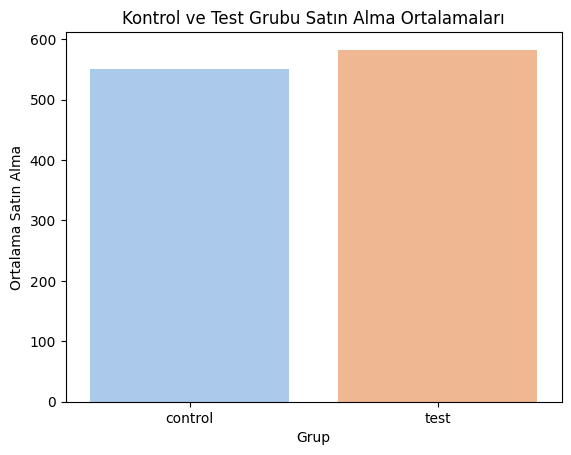

In [48]:
# Grupların ortalama satın alma değerleri
sns.barplot(data=df, x="group", y="Purchase", ci=False, palette="pastel")
plt.title("Kontrol ve Test Grubu Satın Alma Ortalamaları")
plt.ylabel("Ortalama Satın Alma")
plt.xlabel("Grup")
plt.show()

/tmp/ipython-input-49-2341654451.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="group", y="Purchase", palette="Set2")


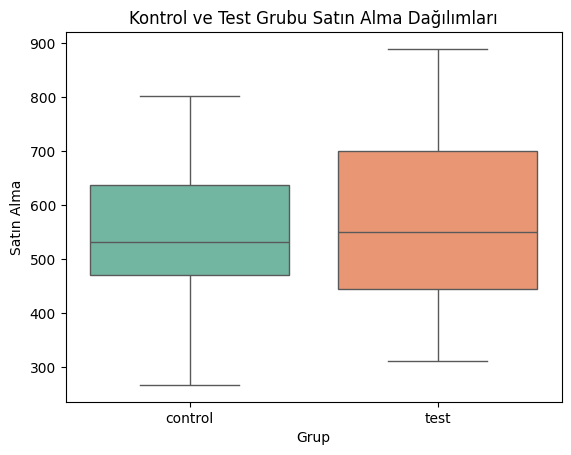

In [49]:
sns.boxplot(data=df, x="group", y="Purchase", palette="Set2")
plt.title("Kontrol ve Test Grubu Satın Alma Dağılımları")
plt.ylabel("Satın Alma")
plt.xlabel("Grup")
plt.show()

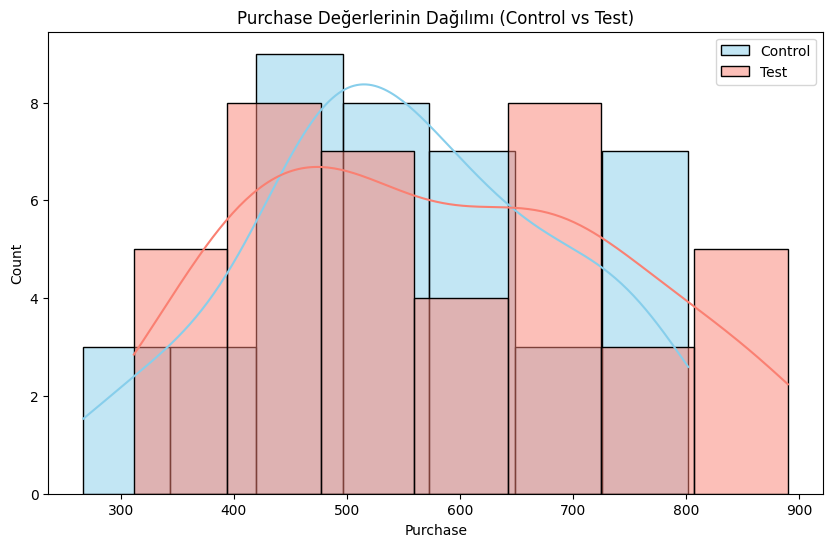

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df["group"]=="control"]["Purchase"], label="Control", kde=True, color="skyblue")
sns.histplot(df[df["group"]=="test"]["Purchase"], label="Test", kde=True, color="salmon")
plt.title("Purchase Değerlerinin Dağılımı (Control vs Test)")
plt.xlabel("Purchase")
plt.legend()
plt.show()

In [51]:
#####################################################################
# Görev 2 : A/B Testinin Hipotezinin Tanımlanması
#####################################################################

In [52]:
# H0 : M1 = M2 (Konrol grubu ve test grubu satın alma ortalamaları arasında fark yoktur)
# H1 : M1 != M2 (Konrol grubu ve test grubu satın alma ortalamaları arasında fark vardır)

In [53]:
df.groupby("group").agg({"Purchase": "mean"})

,Purchase
group,
control,550.89406
test,582.10610


In [54]:
########################################################
# GÖREV 3: Hipotez Testinin Gerçekleştirilmesi
########################################################

In [55]:
# Hipotez testi yapılmadan önce varsayım kontrollerini yapalım. Bunlar Normallik Varsayımı ve Varyans Homojenliğidir.

In [56]:
# Normallik Varsayıımı :
# H0: Normal dağılım varsayımı sağlanmaktadır.
# H1: Normal dağılım varsayımı sağlanmamaktadır.
# p < 0.05 H0 RED
# P > 0.05 H0 REDDEDİLEMEZ

In [57]:
test_stat, pvalue = shapiro(df.loc[df["group"] == "control", "Purchase"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 0.9773, p-value = 0.5891


In [58]:
# H0 reddedilemez. Control grubunun değerleri normal dağılım varsayımı sağlamaktadır

In [59]:
test_stat, pvalue = shapiro(df.loc[df["group"] == "test", "Purchase"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 0.9589, p-value = 0.1541


In [60]:
# H0 reddedilemez. Test grubunun değerleri normal dağılım varsayımı sağlamaktadır

In [61]:
# Varyans Homojenliği:
# H0 : Varyanslar homojendir
# H1 : Varyanslar homojen değildir
# p < 0.05 HO RED
# P > 0.05 H0 REDDEDİLEMEZ

In [62]:
test_stat, pvalue = levene(df.loc[df["group"] == "control", "Purchase"],
                            df.loc[df["group"] == "test", "Purchase"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


In [63]:
# H0 reddedilemez. Control ve test grubunun değerleri varyans homojenliği varsayımını sağlamaktadır.

In [64]:
# Varsayımlar gerçekleştiği için bağımsız iki örneklem t testi (parametrik test) yapılmaktadır.
# H0: M1 = M2 (Kontrol grubu ve test grubu satın alma ortalamaları arasında istatistiksel olarak anlamlı fark yoktur.)
# H0: M1 != M2 (Kontrol grubu ve test grubu satın alma ortalamaları arasında istatistiksel olarak anlamlı fark vardır.)
# p < 0.05 H0 RED , p > 0.05 H0 REDDEDİLEMEZ

In [65]:
test_stat, pvalue = ttest_ind(df.loc[df["group"] == "control", "Purchase"],
                              df.loc[df["group"] == "test", "Purchase"],
                              equal_var =True)
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = -0.9416, p-value = 0.3493


In [66]:
# H0 REDDEDİLEMEZ. İki grup arasında anlamlı bir farklılık yoktur.

In [67]:
########################################################
# GÖREV 4 : Sonuçların Analizi
########################################################

📌 SONUÇLAR VE ÖNERİLER

✅ Analiz Özeti

* Normallik varsayımı her iki grup için de sağlanmıştır.

* Varyans homojenliği varsayımı sağlanmıştır.

* Uygulanan bağımsız iki örneklem t-testi sonucunda:

  - p-value > 0.05 → H₀ reddedilemez.

  - Yani, Average Bidding, Maximum Bidding’e göre istatistiksel olarak anlamlı bir dönüşüm farkı yaratmamıştır.

* Her iki grubun Purchase (satın alma) ortalamaları birbirine oldukça yakındır.

🎯 Öneriler

1. Average Bidding Yöntemi Hemen Uygulamaya Alınmamalıdır

   - Analiz sonuçlarına göre, Average Bidding’in daha iyi performans gösterdiğine dair istatistiksel bir kanıt bulunmamaktadır.

   - Bu nedenle reklam stratejisinin tamamen Average Bidding’e geçirilmesi önerilmez.

2. Segment Bazlı Yeni A/B Testleri Planlanmalıdır

   - Farklı kullanıcı segmentlerinde performans değişebilir.

   - Özellikle şu segmentler bazında yeniden test yapılması önerilir:

      * Yeni ve sadık kullanıcılar

      * Yaş grupları

      * Mobil / desktop kullanıcıları

3. Ek Başarı Metrikleri Dikkate Alınmalıdır

   - Sadece satın alma (Purchase) değil;

      * Click-Through Rate (CTR)

      * Return on Ad Spend (ROAS)

      * Earning (Gelir) gibi metrikler de analiz edilmelidir.

  - Average Bidding belki daha az satış getiriyor olabilir, ama daha düşük maliyetle daha kârlı olabilir.



✅ Nihai Tavsiye

Yapılan A/B testine göre Average Bidding, Maximum Bidding’e göre istatistiksel olarak anlamlı bir fark yaratmamıştır. Bu nedenle mevcut aşamada tüm kampanyaların yeni teklif yöntemine geçirilmesi önerilmemektedir. Ancak daha fazla kullanıcı segmenti ve ek başarı metrikleriyle yapılacak yeni analizler, karar sürecine daha fazla ışık tutacaktır.
